In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
college_file = ("data/college_datav3.csv")

# Read in the DataFrame
df = pd.read_csv(college_file)

pd.set_option("display.max_columns", 1000)

df = df.dropna(axis=0)

# Building a FacetGrid

In [8]:
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,DEBT_MDN,MEDIAN_HH_INC,ICLEVEL,HIGHDEG,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,14600,49720.22,1,4,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,14250,55735.22,1,4,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,15000,58688.62,1,4,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,15274,46065.2,1,4,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City
5,The University of Alabama,105100,5,1181.0,0.2009,0.4059,0.535867,15318.0,9710.0,0.75203252,17500,57928.41,1,4,1,0.0,0.0,13.0,20575.0,Graduate,Public,South East,City: Small,City


C:\Users\acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


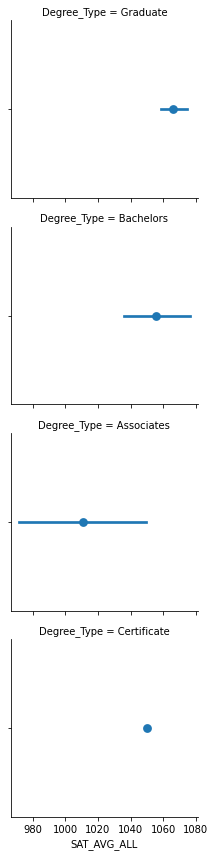

In [10]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(data=df, row="Degree_Type", row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, "SAT_AVG_ALL")

# Show the plot
plt.show()

## Using a catplot

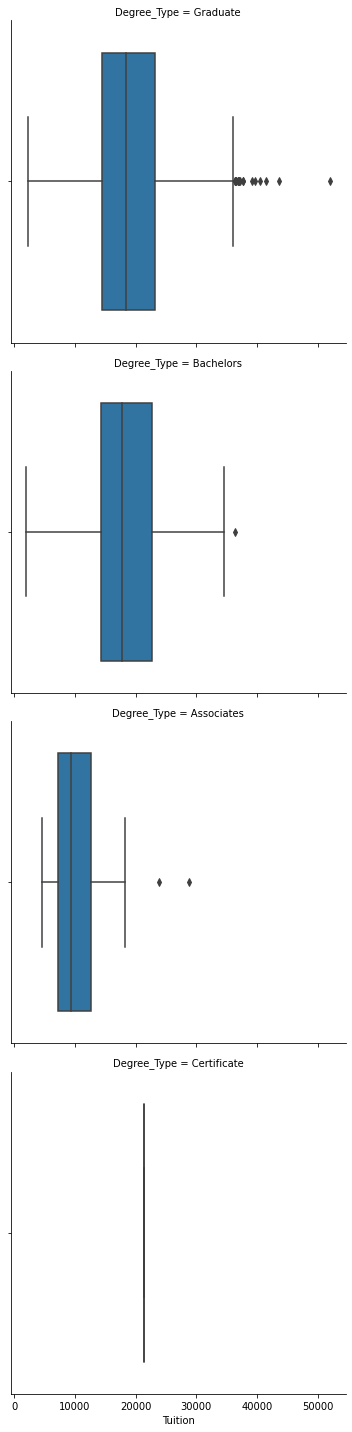

In [12]:
# Create a factor plot that contains boxplots of Tuition values
sns.catplot(data=df,
         x='Tuition',
         kind='box',
         row='Degree_Type')

plt.show()

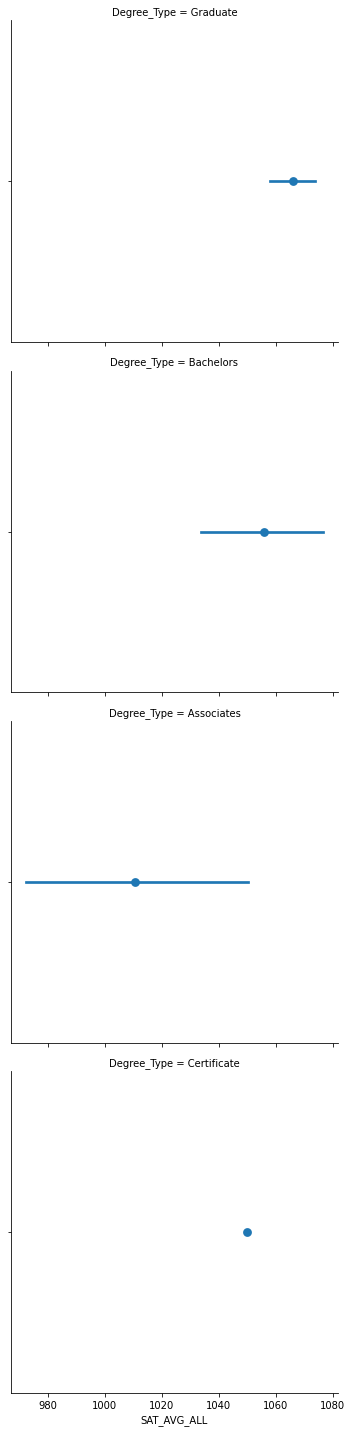

In [14]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()

## Using a lmplot

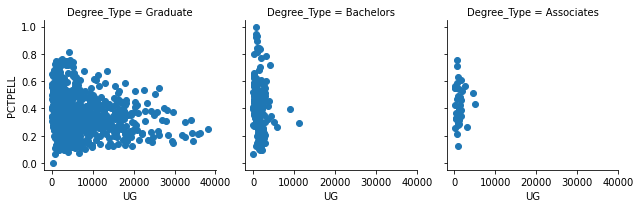

In [16]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
degree_ord = ['Graduate', 'Bachelors', 'Associates']

g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()

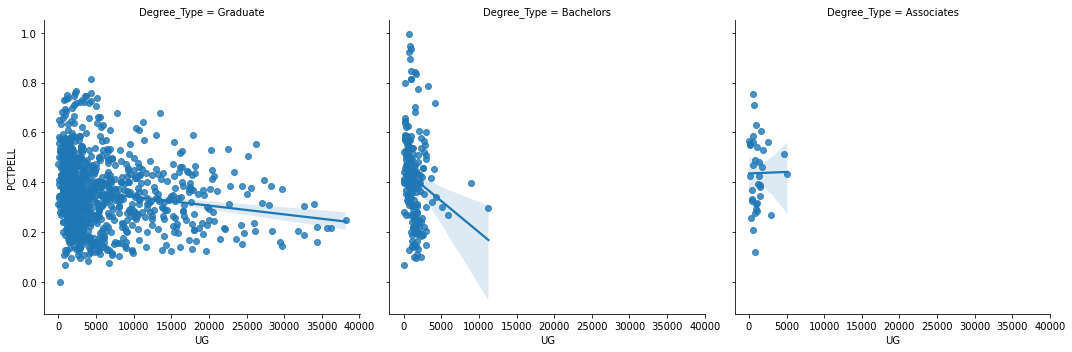

In [17]:
# Re-create the previous plot as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=degree_ord)

plt.show()

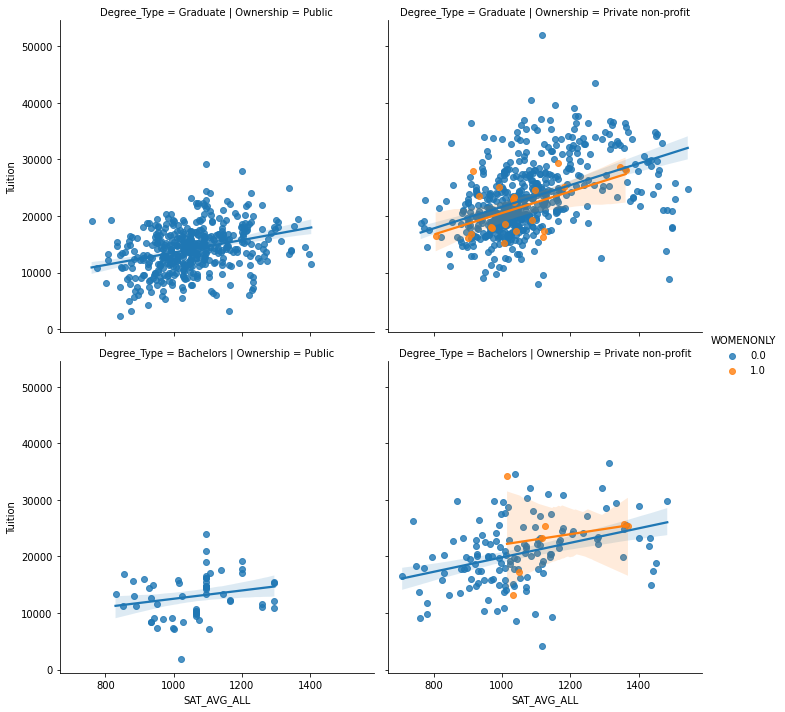

In [19]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
inst_ord = ['Public', 'Private non-profit']

sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=inst_ord)

plt.show()

# Using PairGrid and pairplot

In [20]:
premiums_file = ("data/insurance_premiums.csv")

# Read in the DataFrame
df = pd.read_csv(premiums_file)

pd.set_option("display.max_columns", 1000)

df = df.dropna(axis=0)

In [21]:
df.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


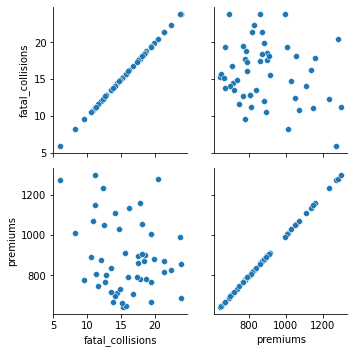

In [23]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])

g.map(sns.scatterplot)

plt.show()

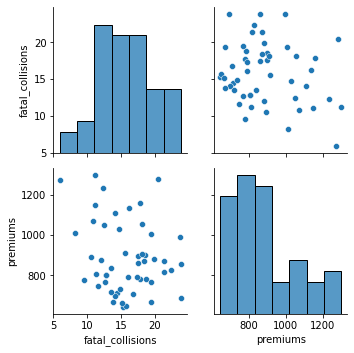

In [25]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])

g2 = g.map_diag(sns.histplot)
g3 = g2.map_offdiag(sns.scatterplot)

plt.show()

## Using a pairplot

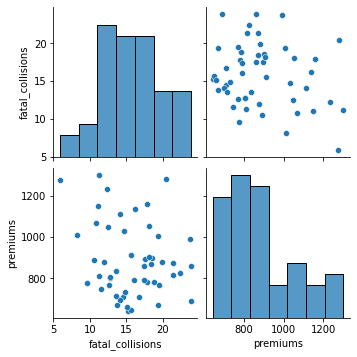

In [26]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()

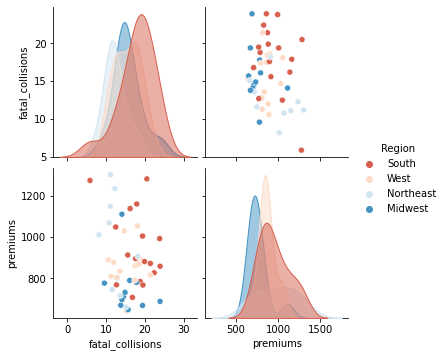

In [27]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()

## Additional pairplots

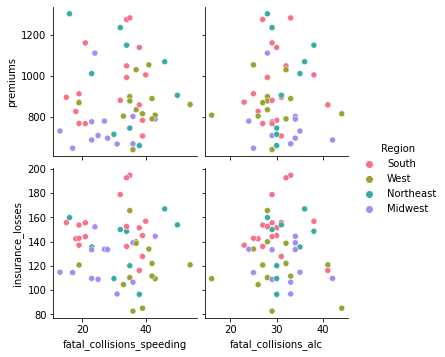

In [29]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()

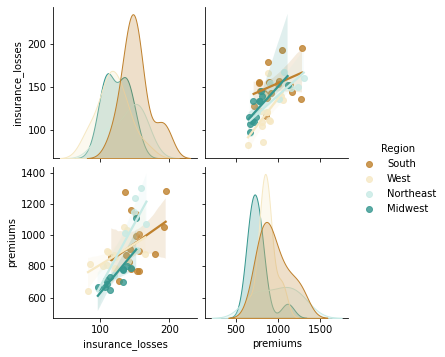

In [33]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()

# Using JointGrid and jointplot

## Building a JointGrid and jointplot

In [34]:
bike_file = ("data/bike_share.csv")

# Read in the DataFrame
df = pd.read_csv(bike_file)

pd.set_option("display.max_columns", 1000)

df = df.dropna(axis=0)

In [36]:
df.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


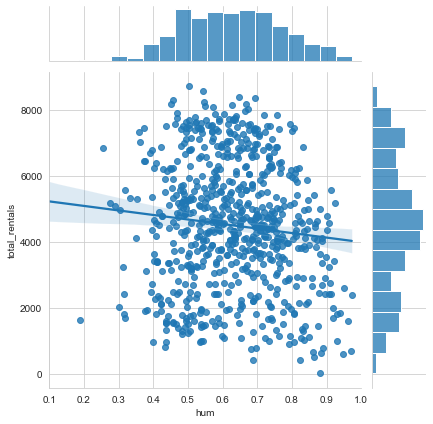

In [39]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")

g = sns.JointGrid(x="hum", y="total_rentals", data=df, xlim=(0.1, 1.0))

g.plot(sns.regplot, sns.histplot)

plt.show()

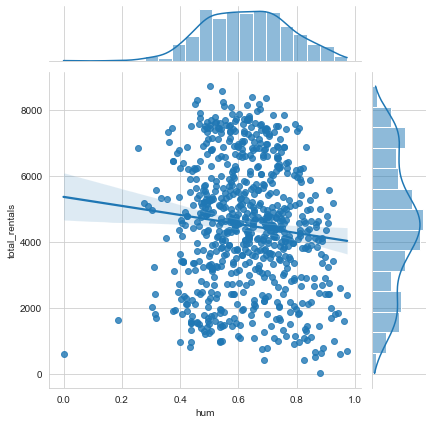

In [41]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)

plt.show()

## Jointplots and regression

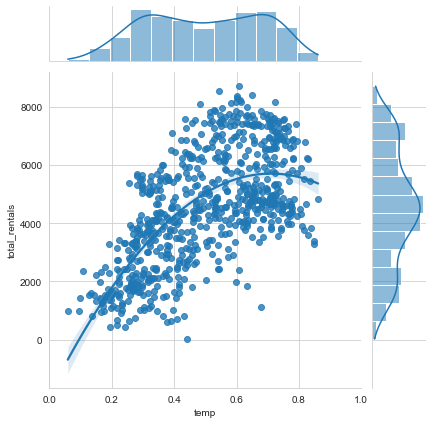

In [42]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()

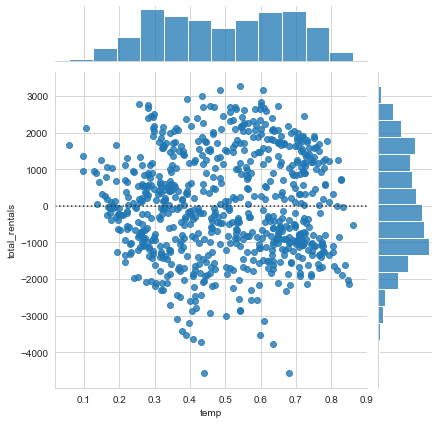

In [43]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=df,
        order=2)

plt.show()

## Complex jointplots

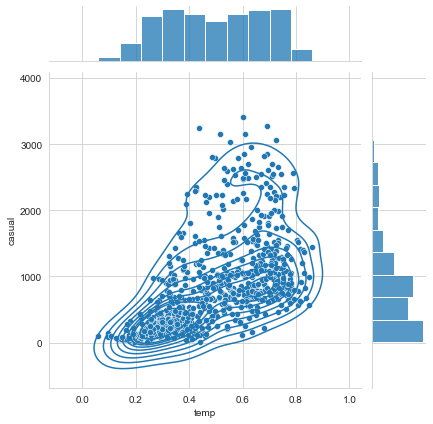

In [48]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10))

g.plot_joint(sns.kdeplot)
    
plt.show()

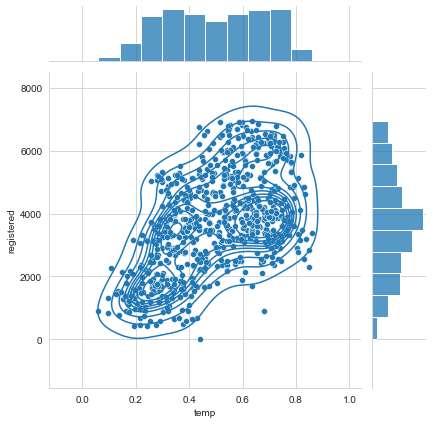

In [50]:
# Replicate the above plot but only for registered riders
g = sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10))

g.plot_joint(sns.kdeplot)

plt.show()

# Selecting Seaborn Plots